# Tarea 2 - Machine Learning
---

## Claudia Hazard 201404523-9
## Matías Araya 201173082-8

---

## 1. Tipos de fronteras en Clasificación
---

# a)
---

Se comienza creando dataset con 2 dimensiones, conformado por dos conjuntos de datos.

In [92]:
import numpy as np
import matplotlib.pyplot as plt

n_samples=500
mean = (0,-4)
C = np.array([[0.3, 0.1], [0.1, 1.5]])
datos1 = np.random.multivariate_normal(mean, C, n_samples)
outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples))*3
outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples))*3
datos2 = np.vstack((outer_circ_x,outer_circ_y)).T
from sklearn.utils import check_random_state
generator = check_random_state(10)
datos2 += generator.normal(scale=0.3, size=datos2.shape)

Se agrega ruido al conjunto de datos para así realizar un estudio mas realista.

In [93]:
X = np.concatenate((datos1, datos2), axis=0)
print len(X)
n = 20 #ruido/noise
y1 = np.zeros(datos1.shape[0]+n)
y2 = np.ones(datos2.shape[0]-n)
y = np.concatenate((y1,y2),axis=0)

1000


Con la configuración de el código anterior existen $1000$ datos en total, los cuales $520$ corresponden a un grupo (puntos azules) y $480$ a otro (puntos verdes). Se nota como el ruido de de $20$ correspondientes realmente al grupo azul, se asemejan más a la figura del grupo verde por lo que genera ruido a la muestra.

La función `visualize_border` es de utilidad para visualizar el conjunto de datos con su respectivo clasificador, el que se utilizará en preguntas posteriores.

In [94]:
def visualize_border(model,x,y,title=""):
    fig = plt.figure(figsize=(12,6))

    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

# b) LDA
---

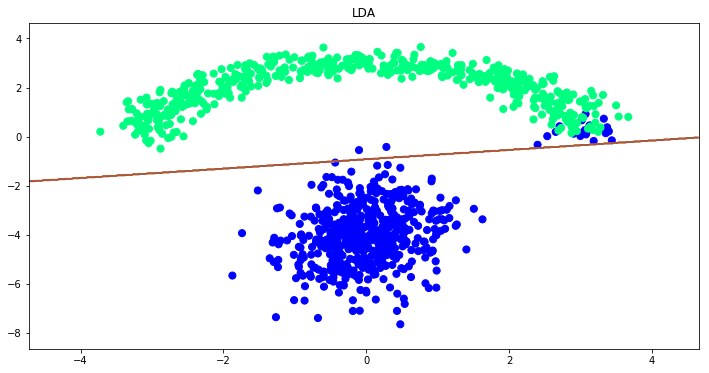

In [95]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_lda = LDA()
model_lda.fit(X,y)
visualize_border(model_lda,X,y,"LDA")

Con Linear Discriminant Analysis (LDA), como se ve en la figura mostrada, traza una linea clara que logra separar la clasificación de ambos grupos, quedando así la mayoría de los puntos azules por un lado y la totalidad de los verdes en el otro.

# c) QDA
--- 

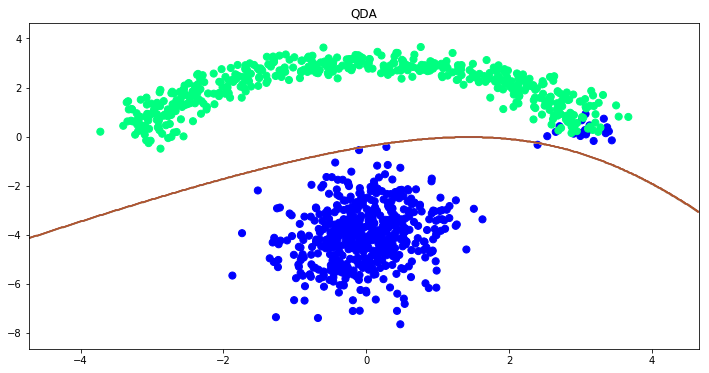

In [96]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model_qda = QDA()
model_qda.fit(X,y)
visualize_border(model_qda,X,y,"QDA")

En este caso con Quadratic Discriminant Analysis (QDA), como lo dice su nombre al ser de tipo cuadrático, logra crear una curva asemejandose de mejor manera a la figura y cualitativamente se podría decir que clasifica mejor que LDA. Esto sin embargo conlleva un mayor costo de computación, con lo que se analiza en próxima sección si vale la pena.

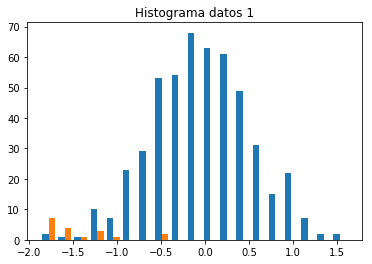

In [97]:
plt.hist(datos1, bins='auto')
plt.title("Histograma datos 1")
plt.show()

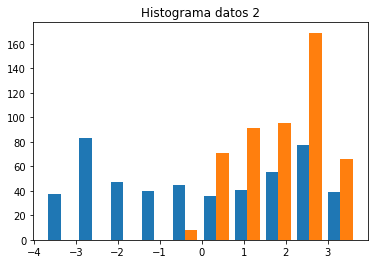

In [98]:
plt.hist(datos2, bins='auto')
plt.title("Histograma datos 2")
plt.show()

# d)
---

In [99]:
from sklearn.metrics import accuracy_score

y_pred_lda = model_lda.predict(X)
y_pred_qda = model_qda.predict(X)

y_true = y

print("Miss Classification Loss LDA: %f"%(1-accuracy_score(y_true, y_pred_lda)))
print("Miss Classification Loss QDA: %f"%(1-accuracy_score(y_true, y_pred_qda)))

Miss Classification Loss LDA: 0.022000
Miss Classification Loss QDA: 0.019000


Con esto se puede ver que la diferencia entre los errores es muy pequña, donde LDA tiene un error de clasificación de $0.021$ y QDA es levemente menor con $0.020$. Con esto se puede comprobar, para este pequeño caso, que no es necesario utilizar QDA ya que genera un gasto extra y no se obtiene una mejor calidad en la predicción.

# e)
---

In [100]:
from ipywidgets import interactive

def visualize_border_interactive(param):
    model = train_model(param)
    visualize_border(model,X,y)

In [108]:
from sklearn.linear_model import LogisticRegression as LR
def train_model(param):
    model=LDA() #define your model
    model.set_params(C=param,penalty='l2')
    model.fit(X,y)
    return model

#estimator.get_params().keys()

p_min = 1
p_max = 10
interactive(visualize_border_interactive,param=(p_min,p_max))

A Jupyter Widget